<a href="https://colab.research.google.com/github/me-nata/Redes-complexas/blob/main/graph_hands_on1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>HandsOn #01 - Gnutella peer-to-peer network</h1>
Trabalho da disciplina de Complex Networks: Exploração de métricas em grafos, plotagem, centralidade e suas correlações com o tema escolhido.

\

\
Natã Oliveira Sousa -- $712480$



\
\
<img src="https://drive.google.com/uc?id=1O0AUQE3j3vQoxf0ojtUnhEJ6tuuYMO5m">
</center>


<h2>O que é Gnutella?</h2>
Gnutella é uma rede de compartilhamento de arquivos usada principalmente para a troca de músicas, filmes e softwares. É uma verdadeira rede peer-to-peer, ou seja, opera sem um servidor central. Os arquivos são trocados diretamente entre os usuários. (O nome vem da junção de GNU com Nutela)

<h2>Sobre a base escolhida</h2>
Rede peer-to-peer Gnutella, 4 de agosto de 2002. Os nós representam hosts na topologia da rede Gnutella e as arestas representam as conexões entre os hosts Gnutella.

Dataset statistics

* Nodes	10876
* Edges	39994
* Nodes in largest WCC	10876 (1.000)
* Edges in largest WCC	39994 (1.000)
* Nodes in largest SCC	4317 (0.397)
* Edges in largest SCC	18742 (0.469)
* Average clustering coefficient	0.0062
* Number of triangles	934
* Fraction of closed triangles	0.001807
* Diameter (longest shortest path)	9
* 90-percentile effective diameter	5.4

\

\

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import plotly.express as px
import pandas as pd
import pickle

\

O Grafo da rede não tem direção, ou seja:

$$G = (V, E), \ E=\{\{v, \ u\} \ |\ v, u \in V \}$$

\

In [ ]:
G = nx.Graph()

# Utils

Para tornar o Grafo mais intuitivo, foi limitado a visão para os $n$ primeiros nós do grafo em uma busca em largura $BFS_n(G)$ para ilustrar melhor a distribuição da rede. Além disso, foi substituido os símbolos dos nós para:

\

<center>
<div style="display: inline-block;">
    <h3>Host</h3>
    <img src="https://drive.google.com/uc?id=1q1rxL5no-Fa1b4UxubxhZwLvjm8LPeuF", width="125" height="175">
</div>
<div style="display: inline-block;">
    <h3>Primeiro Host do (BFS)</h3>
    <img src="https://drive.google.com/uc?id=13ZmfRvTtG23tcxHh1FqYS2MyIzztBLDR", width="125" height="175">
</div>
</center>

\

\

In [ ]:
import requests
from io import BytesIO
import tempfile
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def _put(nodes, img, pos, ax):
    response = requests.get(img)
    with tempfile.NamedTemporaryFile(delete=False, suffix=".png") as temp_img:
        temp_img.write(response.content)
        temp_img_path = temp_img.name

    for node in nodes:
        x, y = pos[node]
        imagebox = OffsetImage(plt.imread(temp_img_path), zoom=0.025)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
        ax.add_artist(ab)


def draw(G, max, start=None, layout=nx.spring_layout):
    image_url = "https://drive.google.com/uc?id=1q1rxL5no-Fa1b4UxubxhZwLvjm8LPeuF"
    start_node_img = "https://drive.google.com/uc?id=13ZmfRvTtG23tcxHh1FqYS2MyIzztBLDR"

    subgraph_plot, start_node = subgraph(G, max, start)
    pos = layout(subgraph_plot)

    fig, ax = plt.subplots(figsize=(15, 8))

    _put(subgraph_plot.nodes(), image_url, pos, ax)
    _put([start_node], start_node_img, pos, ax)

    nx.draw(subgraph_plot, pos=pos, node_size=50)

In [ ]:
from collections import deque

def subgraph(G, max_nodes, start=None):
    visited = set()
    start_node = choice(list(G.nodes())) if start is None else start
    queue = deque([(start_node, None)])
    subgraph = nx.Graph()

    while queue and len(subgraph) < max_nodes:
        node, parent = queue.popleft()
        if node not in visited:
            visited.add(node)
            subgraph.add_node(node)

            if parent is not None:
                subgraph.add_edge(parent, node)

            neighbors = list(G.neighbors(node))
            unvisited_neighbors = [n for n in neighbors if n not in visited]

            queue.extend((n, node) for n in unvisited_neighbors)

    return subgraph, start_node

# Read file

In [ ]:
import os

file_name = 'p2p-Gnutella04.txt'
file_url = "https://drive.google.com/uc?id=15lU-EPsymgwm2Y7PW77od330kMER8yn5"

if not os.path.exists(file_name):
    response = requests.get(file_url)
    with open(file_name, 'wb') as file:
        file.write(response.content)

with open('p2p-Gnutella04.txt', 'r') as arq:
    # head
    for _ in range(4):
        arq.readline()

    # content
    for line in arq.readlines():
        v1, v2 = line.strip().split()
        v1, v2 = int(v1), int(v2)

        G.add_edge(v1, v2)

# Work

<h2>Sumário e alguns layouts</h2>

Number of nodes: 10876
Number of edges: 39994
Density: 0.000676279734351287


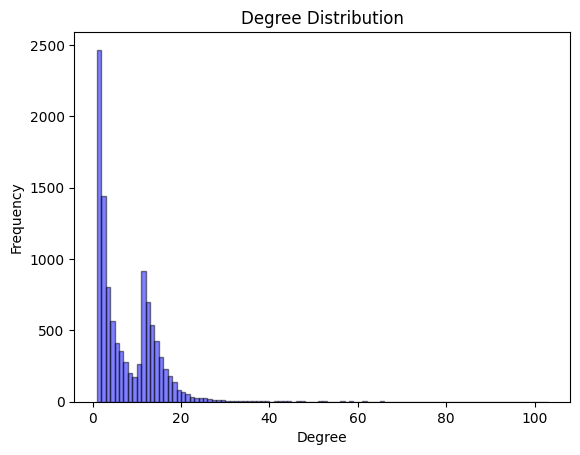

In [ ]:
num_nodes = len(G.nodes())
num_edges = len(G.edges())
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density}")

degrees = dict(G.degree())
degree_values = list(degrees.values())

plt.hist(degree_values, bins=range(min(degree_values), max(degree_values) + 1, 1), alpha=0.5, color='b', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

\

<h3>Algumas conclusões iniciais:</h3>



*   O grafo tem uma densidade baixa
> Isso significa que o grafo em questão é um grafo sparso. No contexto de redes de computadores, esse fato já era esperado pois nem todos os hosts tem conexão entre si.
*  Muitos nós com grau igual a 1. E muitos outros com grau até 20
> No contexto de redes de computadores, os nós com grau 1 são usuários (hosts) únicos. Equanto hosts com um grau maior representam os hosts principais do sites.
*  Muitos nós com grau igual a 1. E muitos outros com grau até 20
> É possível verificar também a rede é de uma topologia radial.



\

<h2>Plots</h2>

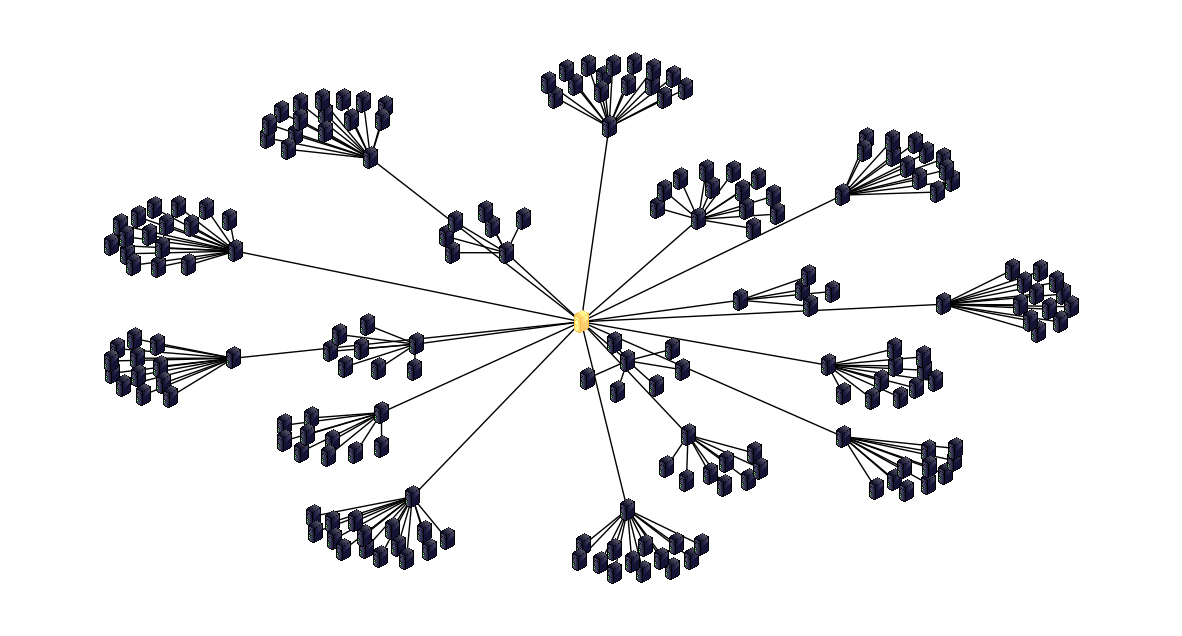

In [ ]:
draw(G, 200, start=0, layout=nx.spring_layout)

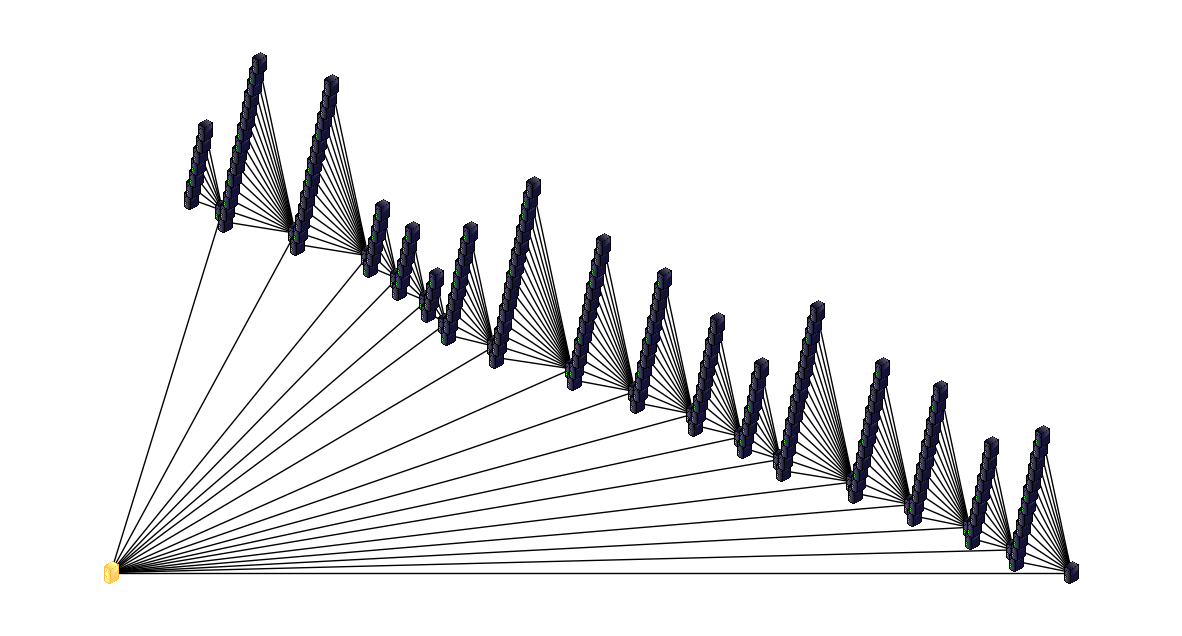

In [ ]:
draw(G, 200, start=0, layout=nx.layout.planar_layout)

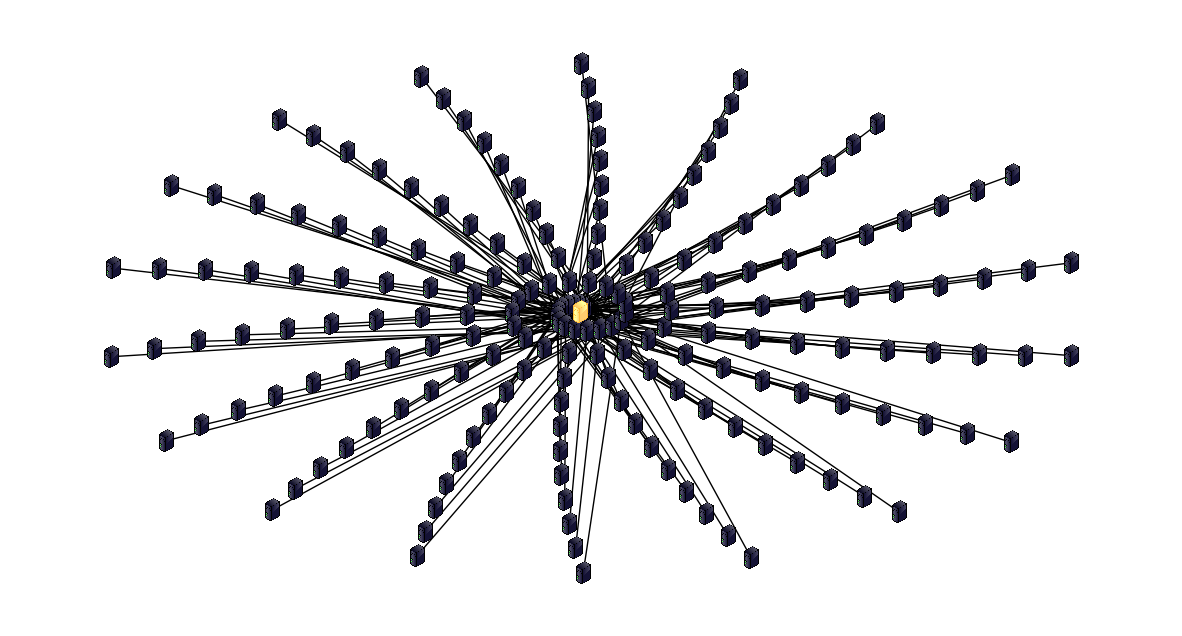

In [ ]:
draw(G, 200, start=0, layout=nx.layout.spiral_layout)

\

<h2>Algumas Metricas</h2>

\

<h3>Betweenness centrality</h3>

Uma das métricas que vamos analisar é a centralidade de intermediação que nos dá um coeficiente do quão intermediário um host é em relação ao outros. No contexto de redes de computadores, nós (hosts) intermediários são os centrais da rede e podem ser os pivots do compartilhamento de dados.

$$g(v) = \sum_{s \neq v \neq t} \frac{σ_{st}(v)}{σ_{st}}$$


Onde $σ_{st}(v)$ é o número de menores caminhos de $s$ a $t$ que passam por $v$.

\

In [ ]:
if not os.path.exists("betweenness_centrality.pkl"):
    betweenness_centrality = nx.betweenness_centrality(G)
    with open("betweenness_centrality.pkl", "wb") as file:
        pickle.dump(betweenness_centrality, file)
else:
    with open("betweenness_centrality.pkl", "rb") as file:
        betweenness_centrality = pickle.load(file)

In [ ]:
centralidade_valores = list(betweenness_centrality.values())
fig = px.box(pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Centralidade']), y="Centralidade", title="Distribuição de Centralidade")
fig.show()

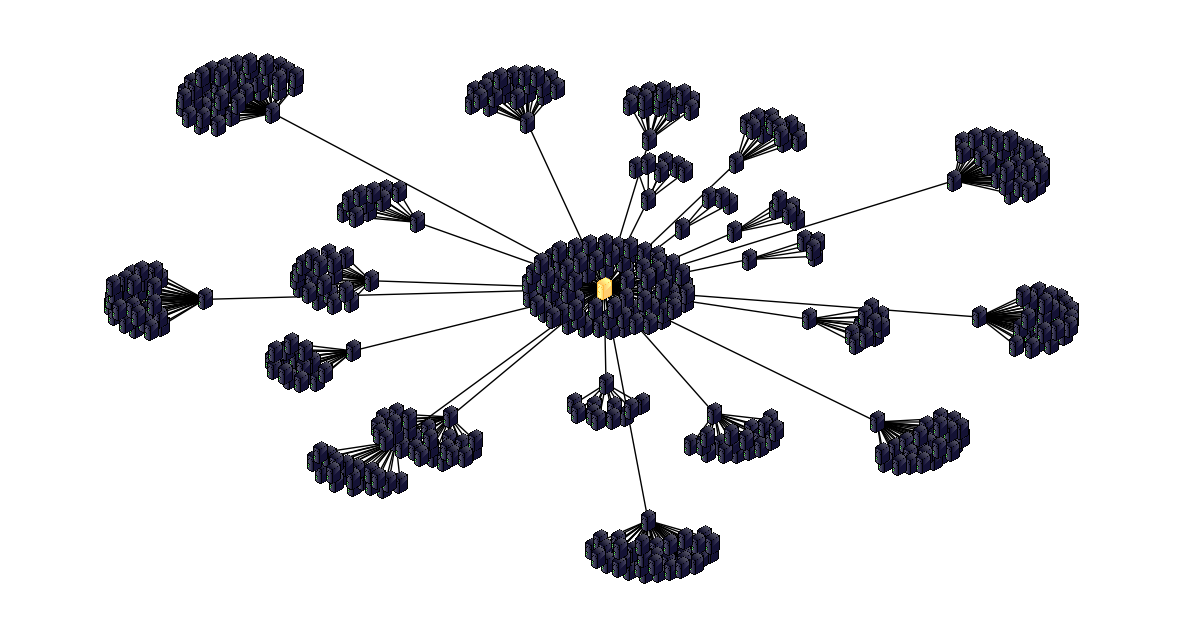

In [ ]:
max_node = max(betweenness_centrality, key=lambda chave: betweenness_centrality[chave])
draw(G, 500, start=max_node)